# Earthworm Lab

<div class="alert alert-block alert-info">
You will work in groups of two or three.

Start by making a copy of this file: Click on File; Make a copy.
Change the name of the file to: FamilynameFirstname_FamilynameFirstname_FamilynameFirstname_computinglab1.ipynb
If your group consist of Harry Potter, Kristine Bonnevie and Isaac Newton, your filename is:   PotterHarry_BonnevieKristine_NewtonIsaac_computinglab1.ipynb

This file should be handed in on CANVAS under Computational Lab 2: Neurosimulation

We want to investigate how certain properties of nerve fibers affect the action potential velocity, or, in other words, the conduction velocity.

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
plt.rcParams.update({'font.size': 12})

This computing lab consists of a virtual laboratory,
where we are going to stimulate a nerve fiber with a sharp electrode.
We want to know how the membrane potential changes when we inject current into the cell.
Our goal is to understand how electric signals evolve over space and time in a neuron.

The experiments will be simulated with the modeling tools [LFPy](lfpy.github.io) and [NEURON](neuron.yale.edu).
These tools will divide the neuron into multiple compartments and represent each compartment by an electric circuit.
<!-- dom:FIGURE: [./figures/multicomp.png, height=400 width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="./figures/multicomp.png" height=400 width=600>

<!-- end figure -->

Then, the membrane potential $V_n$ can be calculated by solving the cable equation for compartment number $n$:


$C_m \frac{dV_n}{dt} = \frac{V_{n+1} - V_n}{R_i} - \frac{V_n - V_{n-1}}{R_i} + \frac{E_m - V_n}{R_m}$
<!-- $C_m \frac{\partial V_m(x, t)}{\partial t} = \frac{E_m - V_m(x, t)}{R_m} + \frac{d}{4 R_i} \frac{\partial^2 V_m}{\partial x^2}$ -->

This equation is derived from the fact that the sum of the current going into
one compartment equals the sum of the current going out of the compartment.
The cable equation says that the membrane potential in compartment number $n$ in a neuron depends on the following factors:
* the resistance of the cell membrane, $R_m$, measured in Ohms ($\Omega$)

* the resistance of the cytoplasm $R_i$, measured in Ohms ($\Omega$)

* the diameter of the cell $d$, measured in meters (m)

* the capacitance of the cell membrane $C_m$, measured in Farads (F)

* the resting membrane potentential $E_m$, measured in volts (V)

* the membrane potential in the neighbor compartments $V_{n+1}$ and $V_{n-1}$, measured in volts (V).

<!-- --- begin exercise --- -->

## Exercise 1: Fill in the blanks
<div id="ex:v_mem"></div>


**a)**
Double click on the text below and replace the [----]s by choosing the correct words from the list below:

The __[----]__ separates ions in the cytoplasm from the extracellular fluids.
The separation of charge generates an electric voltage over the cell membrane.
This voltage is called the __[----]__ and is measured in the unit of __[----]__.
The axon has __[----]__ ion channels, which are necessary for regenerating an __[----]__ potential.

* *voltage*

* *membrane potential*

* *action*

* *capacitance*

* *voltage-gated*

* *amperes*

* *volts*

* *cell membrane*

(Click "play"/ "shift+enter", to make the text go back to normal.)



<!-- --- end exercise --- -->

<!-- --- begin exercise --- -->

## Exercise 2: Injecting current into an axon


Now we are going to simulate an electrophysiology experiment where an
electrode injects electric current into a nerve fiber, specifically an axon, and study how the membrane potential ($V$) develops across the length of the fiber.

Run the code cell below. At the top, you will get three plots. Left: an illustration of the morphology of the axon with the position of the injecting electrode and the recording electrode. Middle: a plot of the injected current. Here, we inject a $0.3$ nA current lasting $5$ ms. Right: A plot of the membrane potential recorded over time.

Under the top three plots, you'll get an interactive plot of the membrane potential across space. There's a slider you can use to move through the different time points of the experiment.

**The plotting might lag a bit, so go slow when you change the time points.**


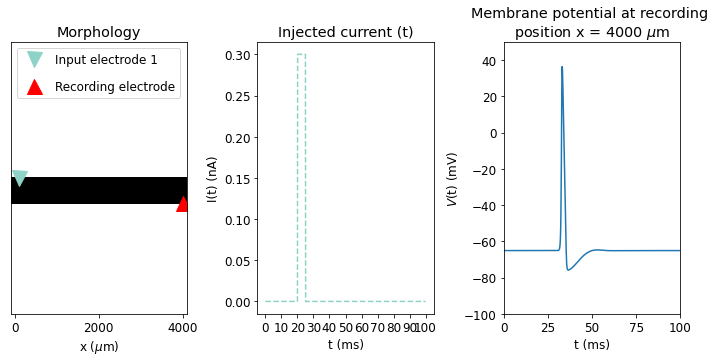

interactive(children=(FloatSlider(value=20.0, description='t (ms)', max=40.0, min=10.0, step=0.5), Output()), …

In [3]:
morphology = './cells/axon.hoc'
active = True

delays = [20]
input_locs = [100]
cell, electrodes = simulate_cell(morphology, i_amp = 0.3, i_dur = 5, active = active, delays = delays, input_locs = input_locs)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))
ax_morph = axes[0]
ax_i = axes[1]
ax_v_t = axes[2]

x_rec = 4000
# plot morphology
plot_morph(ax_morph, cell, input_locs = input_locs, rec_locs=[x_rec])
# plot injected current as function of time
plot_electrode_current(ax_i, cell, electrodes)
# plot membrane potential where current is injected as function of time
plot_membrane_potential_t(ax_v_t, ax_morph, cell, x_rec, label = None)
tittel = 'Membrane potential at recording \nposition x = ' + str(x_rec)+' $\mu$m'
ax_v_t.set_title(tittel)

ax_morph.legend(loc = 'upper left', labelspacing=1.2)

fig.subplots_adjust(hspace=0.5, wspace = 0.4)

def make_vx_fig(timepoint):
    fig, ax_v_x = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
    
    plot_membrane_potential_x(ax_v_x, cell, timepoint)

slider = widgets.interact(make_vx_fig,
                          timepoint=widgets.FloatSlider(description='t (ms)', min=10, max=40., step=0.5, value=20.))

**a)** Use the plots and the slider. How long does it (approximately) take before the action potential generated by the stimulation reaches the recording electrode?

**Answer:** 13 ms

**b)** Give a formula for calculating the conduction velocity using the variables recording electrode position (`rec_el_pos`), injection electrode position (`inj_el_pos`), and travel time (`travel_time`).

**Answer:** cond_vel = (rec_el_pos-inj_el_pos)/travel_time

**c)** Use your formula to complete the function 'compute_conduction_vel' in the cell below that calculates the conduction velocity of the nerve fiber. Use the parameters 'rec_el_pos', 'inj_el_pos', and 'travel_time' in the calculation. Again, 'rec_el_pos' = recording electrode position, 'inj_el_pos' = Injecting electrode position, both given in micrometer, and 'travel_time' = time it takes for the action potential to reach the recording electrode from the stimulating electrode, given in milliseconds.

In [4]:
def compute_conduction_vel(rec_el_pos, inj_el_pos, travel_time):
    velocity = (rec_el_pos-inj_el_pos)/travel_time
    return velocity

**d)** Use the function you created in **b** and the answer you found in **a** to calculate the conduction velocity of the axon in this exercise. Fill in the blanks to complete the code and do the calculation in the cell below and write your answer in the 'Answer' cell. Make sure you use the correct units.

In [8]:
rec_el_pos = 4000 # um
inj_el_pos = 0 # um
travel_time = 13 # ms
conduct_vel_axon1 = compute_conduction_vel(rec_el_pos, inj_el_pos, travel_time)
print(conduct_vel_axon1) # um/ms

307.6923076923077


**Answer:** 307.7 $\mu$m/ms

## Exercise 3 - Conduction velocity as a function of axon thickness

In this exercise, we will look at how the conduction velocity depends on axon thickness.

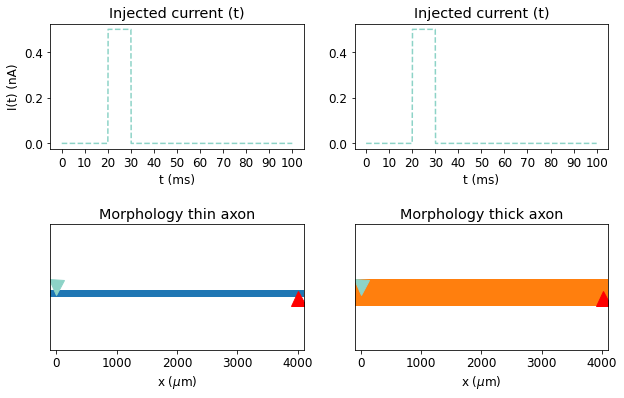

interactive(children=(FloatSlider(value=20.0, description='t (ms)', max=40.0, min=10.0, step=0.5), Output()), …

In [6]:
# define cell morphologies
morphology_thin = './cells/axon_thin.hoc'
morphology_thick = './cells/axon_thick.hoc'
# simulate cells
active = True
# i_amp sets the amplitude of the current injection in (nA)
axon_thin, stim_electrodes1 = simulate_cell(morphology_thin, [0.], i_dur = 10, i_amp=.5, active = active)
axon_thick, stim_electrodes2 = simulate_cell(morphology_thick, [0.], i_dur = 10, i_amp=.5, active = active)

fig = figure(figsize=(10,6))
ax_morph1 = subplot2grid((2,2), (1,0))
ax_morph2 = subplot2grid((2,2), (1,1))
ax_i1 = subplot2grid((2,2), (0,0))
ax_i2 = subplot2grid((2,2), (0,1))
#ax_v_t = subplot2grid((3,2), (2,1))

fig.subplots_adjust(hspace = 0.6)

# plot axon morphologies
c_thin = 'C0'
c_thick = 'C1'
x_rec = 4000
plot_morph(ax_morph1, axon_thin, input_locs = [0], rec_locs = [x_rec], color=c_thin, title = 'Morphology thin axon')
plot_morph(ax_morph2, axon_thick, input_locs = [0], rec_locs = [x_rec], color=c_thick, title = 'Morphology thick axon')
# plot injected currents as function of time
plot_electrode_current(ax_i1, axon_thin, stim_electrodes1)
plot_electrode_current(ax_i2, axon_thick, stim_electrodes2)
ax_i2.set_ylabel('')

def make_vx_fig(timepoint):
    # create figure comparing the two simulations
    fig, ax_v_x = plt.subplots(figsize = (5,5))

    # plot membrane potential at time point 21 ms as function of axon length.
    plot_membrane_potential_x(ax_v_x, axon_thin, timepoint, label = 'Thin axon')
    plot_membrane_potential_x(ax_v_x, axon_thick, timepoint, label = 'Thick axon')
    ax_v_x.set_ylim([-80., 40])
    ax_v_x.legend(bbox_to_anchor = (1.5, 0.7))
    #plotting_cosmetics(fig)
    #show()
    
slider = widgets.interact(make_vx_fig,
                          timepoint=widgets.FloatSlider(description='t (ms)', min=10, max=40., step=0.5, value=20.))

**a)** Judged qualitatively from the plots, which axon has the highest conduction velocity?

**Answer:** The thick one

**b)** Use the function you made to calculate conduction velocity in exercise **2b** and the plots above to calculate the exact conduction velocity for both the thin and the thick axon. Give your answers with units in th '**Answer**' cell.

In [7]:
cv_thin_axon = compute_conduction_vel(rec_el_pos, inj_el_pos, 16.5)
cv_thick_axon = compute_conduction_vel(rec_el_pos, inj_el_pos, 11.7)
print(cv_thin_axon)
print(cv_thick_axon)

242.42424242424244
341.8803418803419


**Answer**: 341.9 um/ms and 242.4 um/ms

## Exercise 4: Effect of temperature on conduction velocity

In the wet lab you will apply heat to the earth worms before you do the experiments to increase the conductivity. Below we've again set up a simulation of the experimental protocole where you stimulate two different axons, but this time the axon diameter is the same. What you'll vary this time is the temperature. 

Changing temperature 0.00 to 1.00


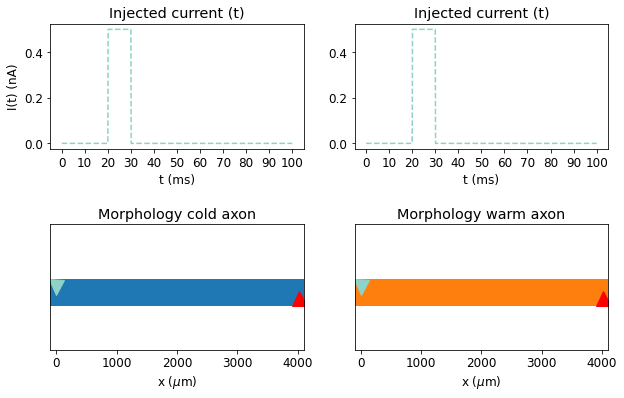

interactive(children=(FloatSlider(value=20.0, description='t (ms)', max=40.0, min=10.0, step=0.5), Output()), …

In [8]:
# define cell morphologies
morphology_thick = './cells/axon_thick.hoc'
# simulate cells
active = True

temperature1 = 0
temperature2 = 1 # <--------- Change this


# i_amp sets the amplitude of the current injection in (nA)
axon_cold, stim_electrodes1 = simulate_cell(morphology_thick, [0.], i_dur = 10, i_amp=.5, active = active, \
                                            temperature = temperature1)
axon_warm, stim_electrodes2 = simulate_cell(morphology_thick, [0.], i_dur = 10, i_amp=.5, active = active, \
                                            temperature = temperature2)

fig = figure(figsize=(10,6))
ax_morph1 = subplot2grid((2,2), (1,0))
ax_morph2 = subplot2grid((2,2), (1,1))
ax_i1 = subplot2grid((2,2), (0,0))
ax_i2 = subplot2grid((2,2), (0,1))
#ax_v_t = subplot2grid((3,2), (2,1))

fig.subplots_adjust(hspace = 0.6)

# plot axon morphologies
c_thin = 'C0'
c_thick = 'C1'
x_rec = 4000
plot_morph(ax_morph1, axon_cold, input_locs = [0], rec_locs = [x_rec], color=c_thin, title = 'Morphology cold axon')
plot_morph(ax_morph2, axon_warm, input_locs = [0], rec_locs = [x_rec], color=c_thick, title = 'Morphology warm axon')
# plot injected currents as function of time
plot_electrode_current(ax_i1, axon_cold, stim_electrodes1)
plot_electrode_current(ax_i2, axon_warm, stim_electrodes2)
ax_i2.set_ylabel('')

def make_vx_fig(timepoint):
    # create figure comparing the two simulations
    fig, ax_v_x = plt.subplots(figsize = (5,5))

    # plot membrane potential at time point 21 ms as function of axon length.
    plot_membrane_potential_x(ax_v_x, axon_cold, timepoint, label = 'Cold axon')
    plot_membrane_potential_x(ax_v_x, axon_warm, timepoint, label = 'Warm axon')
    ax_v_x.set_ylim([-80., 40])
    ax_v_x.legend(bbox_to_anchor = (1.5, 0.7))
    #plotting_cosmetics(fig)
    #show()
    
slider = widgets.interact(make_vx_fig,
                          timepoint=widgets.FloatSlider(description='t (ms)', min=10, max=40., step=0.5, value=20.))

**a)** Change the value `temperature2` to some number 0 and 10 while keeping the temperature of the other axon (`temperature1`) constant. Then move the slider and observe the effect of changing the temperature (orange line in plot). **Note:** You need to rerun the cell after each change of the temperature.

**b)** Set `temperature2`to 10 degrees Celsius and rerun the cell. What's the factor change in conduction velocity with a 10 degree Celsius difference in the temperature between the two axons? That is, if you divide the conduction velocity of the "warm" axon by the conduction velocity of the "cold" axon, what factor do you get? (You don't have to actually calculate the conduction velocities to answer this question, it's possible to answer this just by studying the bottom plot, but you can calculate them if you want to.)

**Answer:** About a factor 2 difference

## Exercise 5: How long is the refractory period?

After an action potential has been fired, a new one cannot be generated immediately. The time it takes from one action potential has fired until a new one can be generated with the same stimulus strength is called the total refractory period. The total refractory period can be further subdivided into two distinct periods: the absolute refractory period and the relative refractory period (see illustration below). The absolute refractory period is the time in which no new action potential can be generated no matter how strongly you stimulate the cell. The relative refractory period is the time where you can generate a new action potential, but only if you use a stronger stimulus. Run the cells below and carry out the instructions to study the refractory period.

<!-- dom:FIGURE: [./figures/Refractory.jpg, height=400 width=600 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="./figures/Refractory.jpg" height=400 width=600>

<!-- end figure -->

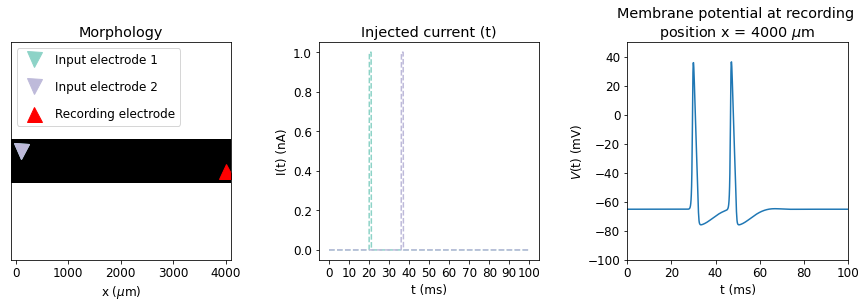

interactive(children=(FloatSlider(value=20.0, description='t (ms)', min=10.0, step=0.5), Output()), _dom_class…

In [10]:
morphology = './cells/axon_thick.hoc'
active = True

time_1st_stimulation = 20
time_2nd_stimulation = 36

stimulation_times = [time_1st_stimulation, time_2nd_stimulation]
input_locs = [100, 100]

cell, electrodes = simulate_cell(morphology, i_amp = 1.0, i_dur = 1, active = active, delays = stimulation_times, input_locs = input_locs)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
ax_morph = axes[0]
ax_i = axes[1]
ax_v_t = axes[2]

x_rec = 4000
# plot morphology
plot_morph(ax_morph, cell, input_locs = input_locs, rec_locs=[x_rec])
# plot injected current as function of time
plot_electrode_current(ax_i, cell, electrodes)
# plot membrane potential where current is injected as function of time
plot_membrane_potential_t(ax_v_t, ax_morph, cell, x_rec, label = None)
tittel = 'Membrane potential at recording \nposition x = ' + str(x_rec)+' $\mu$m'
ax_v_t.set_title(tittel)

ax_morph.legend(loc = 'upper left', labelspacing=1.2)

fig.subplots_adjust(hspace=0.5, wspace = 0.4)

def make_vx_fig(timepoint):
    fig, ax_v_x = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
    
    plot_membrane_potential_x(ax_v_x, cell, timepoint)

slider = widgets.interact(make_vx_fig,
                          timepoint=widgets.FloatSlider(description='t (ms)', min=10, max=100., step=0.5, value=20.))

**a)** In this exercise, you will stimulate the same axon twice and change the parameters to find out how long the refractory period of this axon is. The parameter to adjust is the one named `time_2nd_stimulation` - the time at which the cell is stimulated a second time. Change it, rerun the cell, and see when you get a second spike. What's the smallest difference between `time_2nd_stimulation` and `time_1st_stimulation` where you get two spikes? That's the total refractory period of the axon.

**Answer:** About 16 ms

**b)** In exercise **a** you found the total refractory period. Describe a strategy to find the duration of the *absolute* and *relative* refractory periods. (You don't need to implement it.)

**Hint:** Vary the amplitude of the stimulation current and the time difference between the two stimulations independently. Think carefully about the definition of the absolute and relative refractory periods and remember that total refractory period = absolute refractory period + relative refractory period.

**Answer:** 

**1)** Make the injected current amplitude of the second stimulation large and then keep the current amplitudes fixed while you alter the interval between the two stimuli. The interval at which you first get a second action potential is the absolute refractory period.

**2)** The total refractory period can be found by the approach used in **a** - have the same amplitude for the first and second stimulation and vary the interval until you get a second action potential. The relative refractory period can then be found by taking the total refractory period minus the absolute refractory period found in step 1.